<a href="https://colab.research.google.com/github/saishshinde15/LangGraph_/blob/main/Simple_tool_in_Langraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langgraph

In [4]:
%pip install -qU langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 1.5 MB/s eta 0:00:00


In [2]:
import getpass
import os

os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your Groq API key: ")

Enter your Groq API key: ··········


In [5]:
from langchain_groq import ChatGroq

llm = ChatGroq(
   model="llama3-8b-8192",
    temperature=0,)

In [6]:
def add (a:int,b:int):
  """Add two numbers"""
  return a+b

In [7]:
llm_with_tools=llm.bind_tools([add])

### We use the built-in ToolNode and simply pass a list of our tools to initialize it.

### We use the built-in tools_condition as our conditional edge.

In [8]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [9]:
# create a MessagesState Node
def tool_calling_llm(state: MessagesState) -> MessagesState:
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

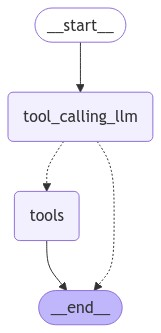

In [18]:
builder=StateGraph(MessagesState)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode([add]))
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm",tools_condition)
builder.add_edge("tools",END)
graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [20]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Hello world.")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()  # No tools are used

================================ Human Message =================================

Hello world.
================================== Ai Message ==================================

<tool-use>
{
	"tool_calls": []
}
</tool-use>


In [21]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="what is 2+3")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()  #tools are used

================================ Human Message =================================

what is 2+3
================================== Ai Message ==================================
Tool Calls:
  add (call_r3g2)
 Call ID: call_r3g2
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: add

5


#create a tool by creating a function
#bind the tool with llm
#invoke the tool in a function of MessageState
#Use the built-in ToolNode and simply pass a list of our tools to initialize it.
#Use the built-in tools_condition as our conditional edge.
#Add State
#Add Nodes(your known logic)
#Add Edges and Conditional Edges(your known logic)
#Build the Graph